In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from warnings import filterwarnings

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
filterwarnings('ignore')

csv_files = glob('*.csv')

df = pd.read_csv(csv_files[0])

# Data Analysis

In [ ]:
df=pd.read_csv('/content/netflix.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Dropping unwanted coluns

In [ ]:
df=df.drop(['show_id','description'],axis=1)
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)

df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   date_added    7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
dtypes: int64(1), object(9)
memory usage: 667.7+ KB


In [ ]:
df.isna().sum()


type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Data Explotary Analysis

In [ ]:
describtion={
    'TV-MA' : 'Mature audience only',
    'TV-14' : 'Parents Strongly cautioned',
    'TV-PG' : 'Parental Guidance suggested',
    'TV-Y' : 'Children between 2 and 6 ages',
    'TV-Y7' : 'Children between 7 and above',
    'TV-G' : 'All audience',
    'TV-Y7-FV' : 'Contains fantasy violence',
    'R' : 'Restricted',
    'PG-13' : 'Parents strongly cautioned',
    'PG' : 'Parental guidance suggested',
    'G' : 'General audience',
    'UR' : 'Unrated',
    'NC-17' : 'Clearly Adult'

}
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
cols = ['Type', 'Title', 'Director', 'Cast', 'Country', 'Added Date',
       'Year', 'Rating', 'Duration', 'Listed in']

df.columns = cols

In [ ]:
df.head(5)

,Type,Title,Director,Cast,Country,Added Date,Year,Rating,Duration,Listed in
0,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


# Data Graphical Representation

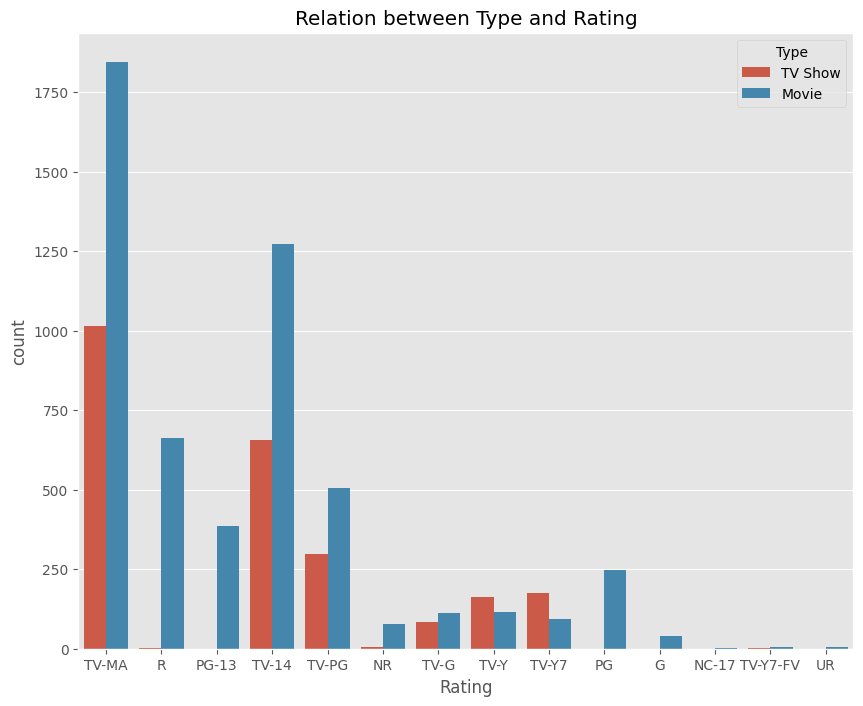

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Rating',hue='Type',data=df)
plt.title('Relation between Type and Rating')
#plt.legend()
plt.show()

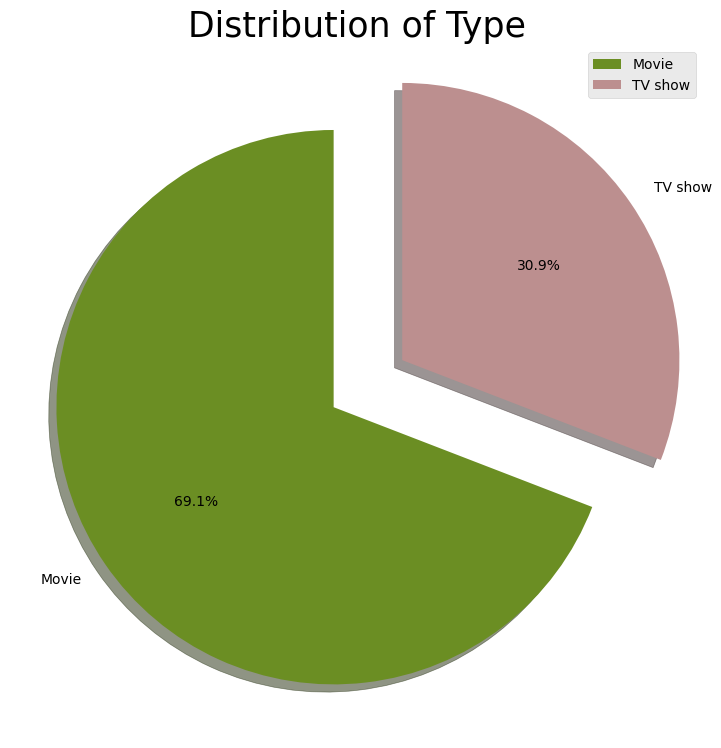

In [ ]:
labels = ['Movie', 'TV show']
size = df['Type'].value_counts()
explode = [0.1, 0.2] #radius
plt.figure(figsize=(9, 9))
plt.pie(size,autopct='%1.1f%%',labels=labels,colors=['olivedrab', 'rosybrown'], explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

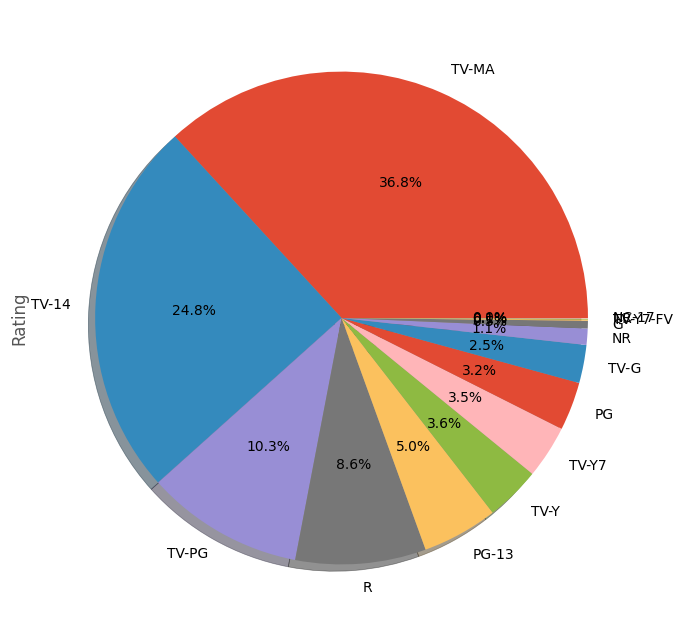

In [ ]:
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# World Cloud

In [ ]:
from wordcloud import WordCloud

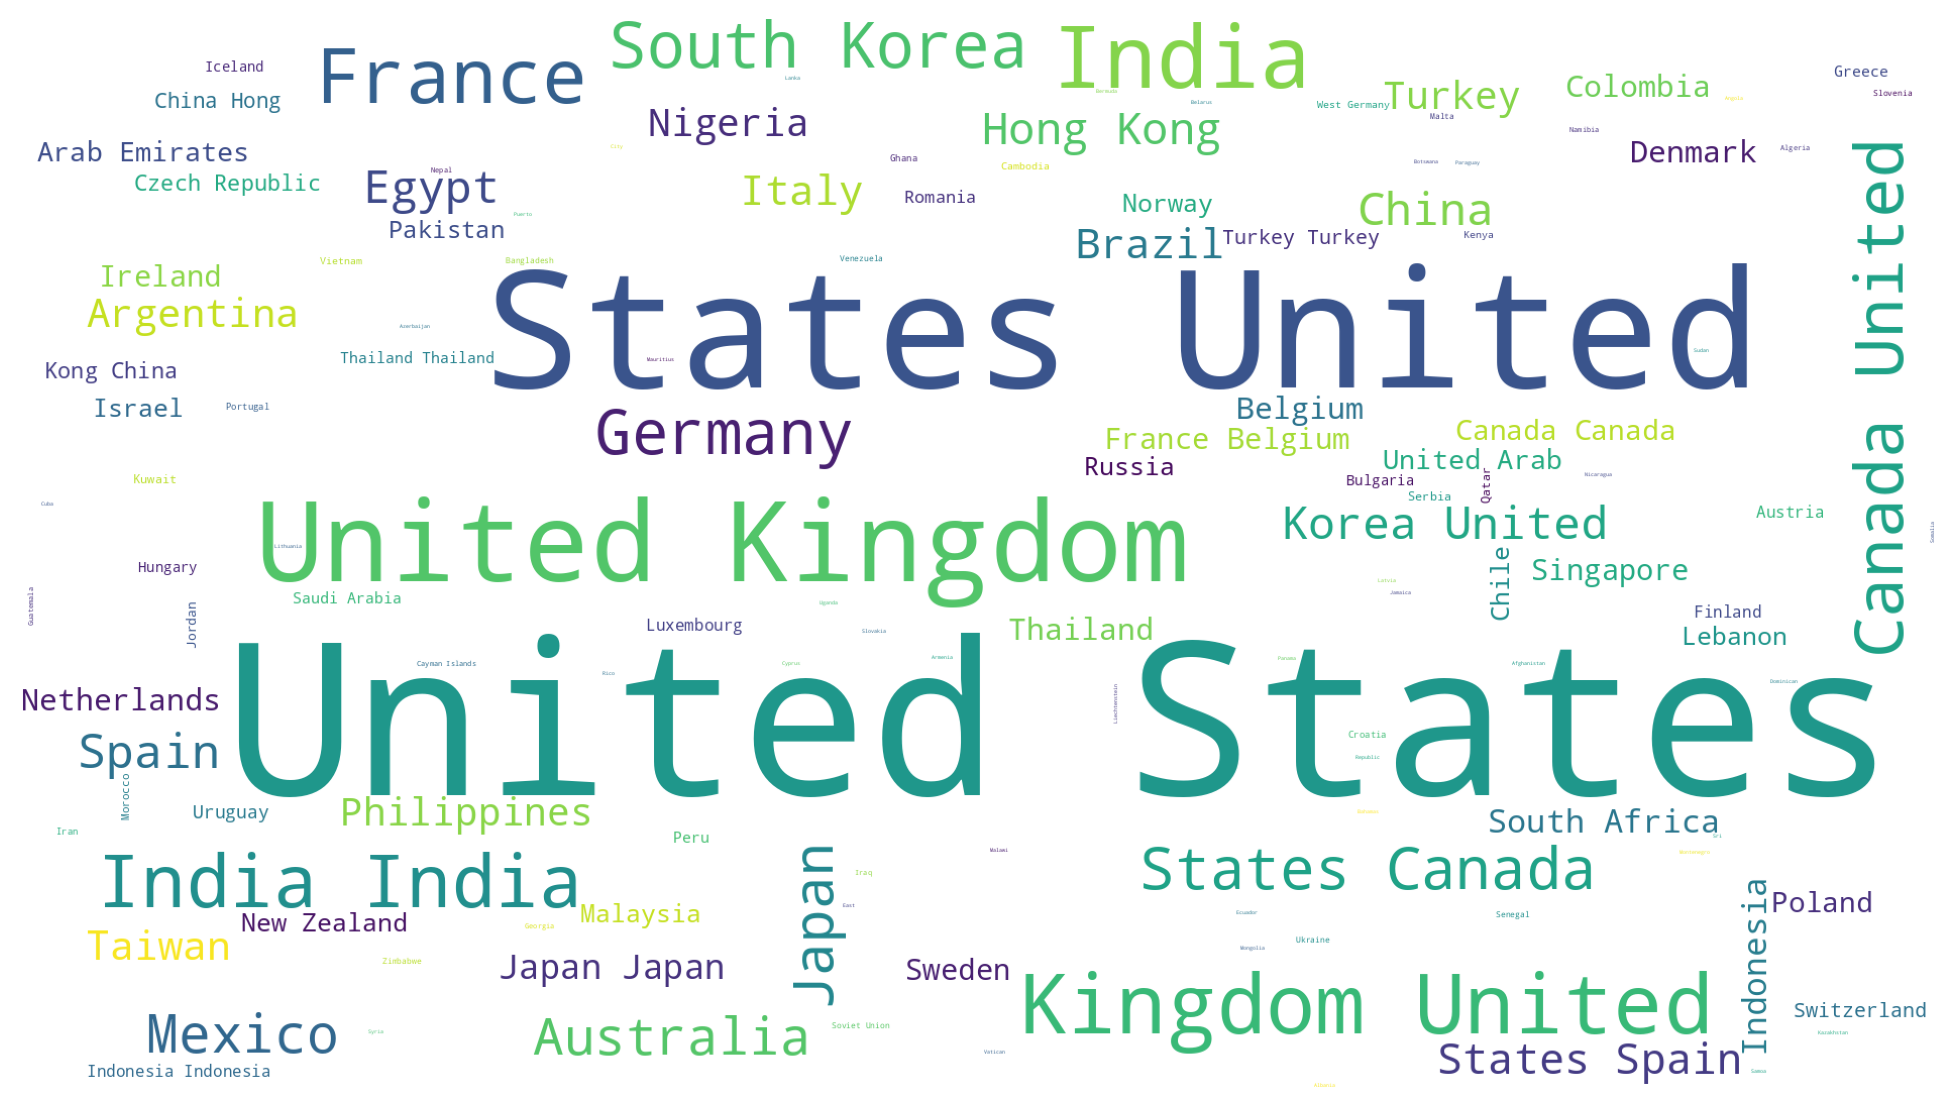

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

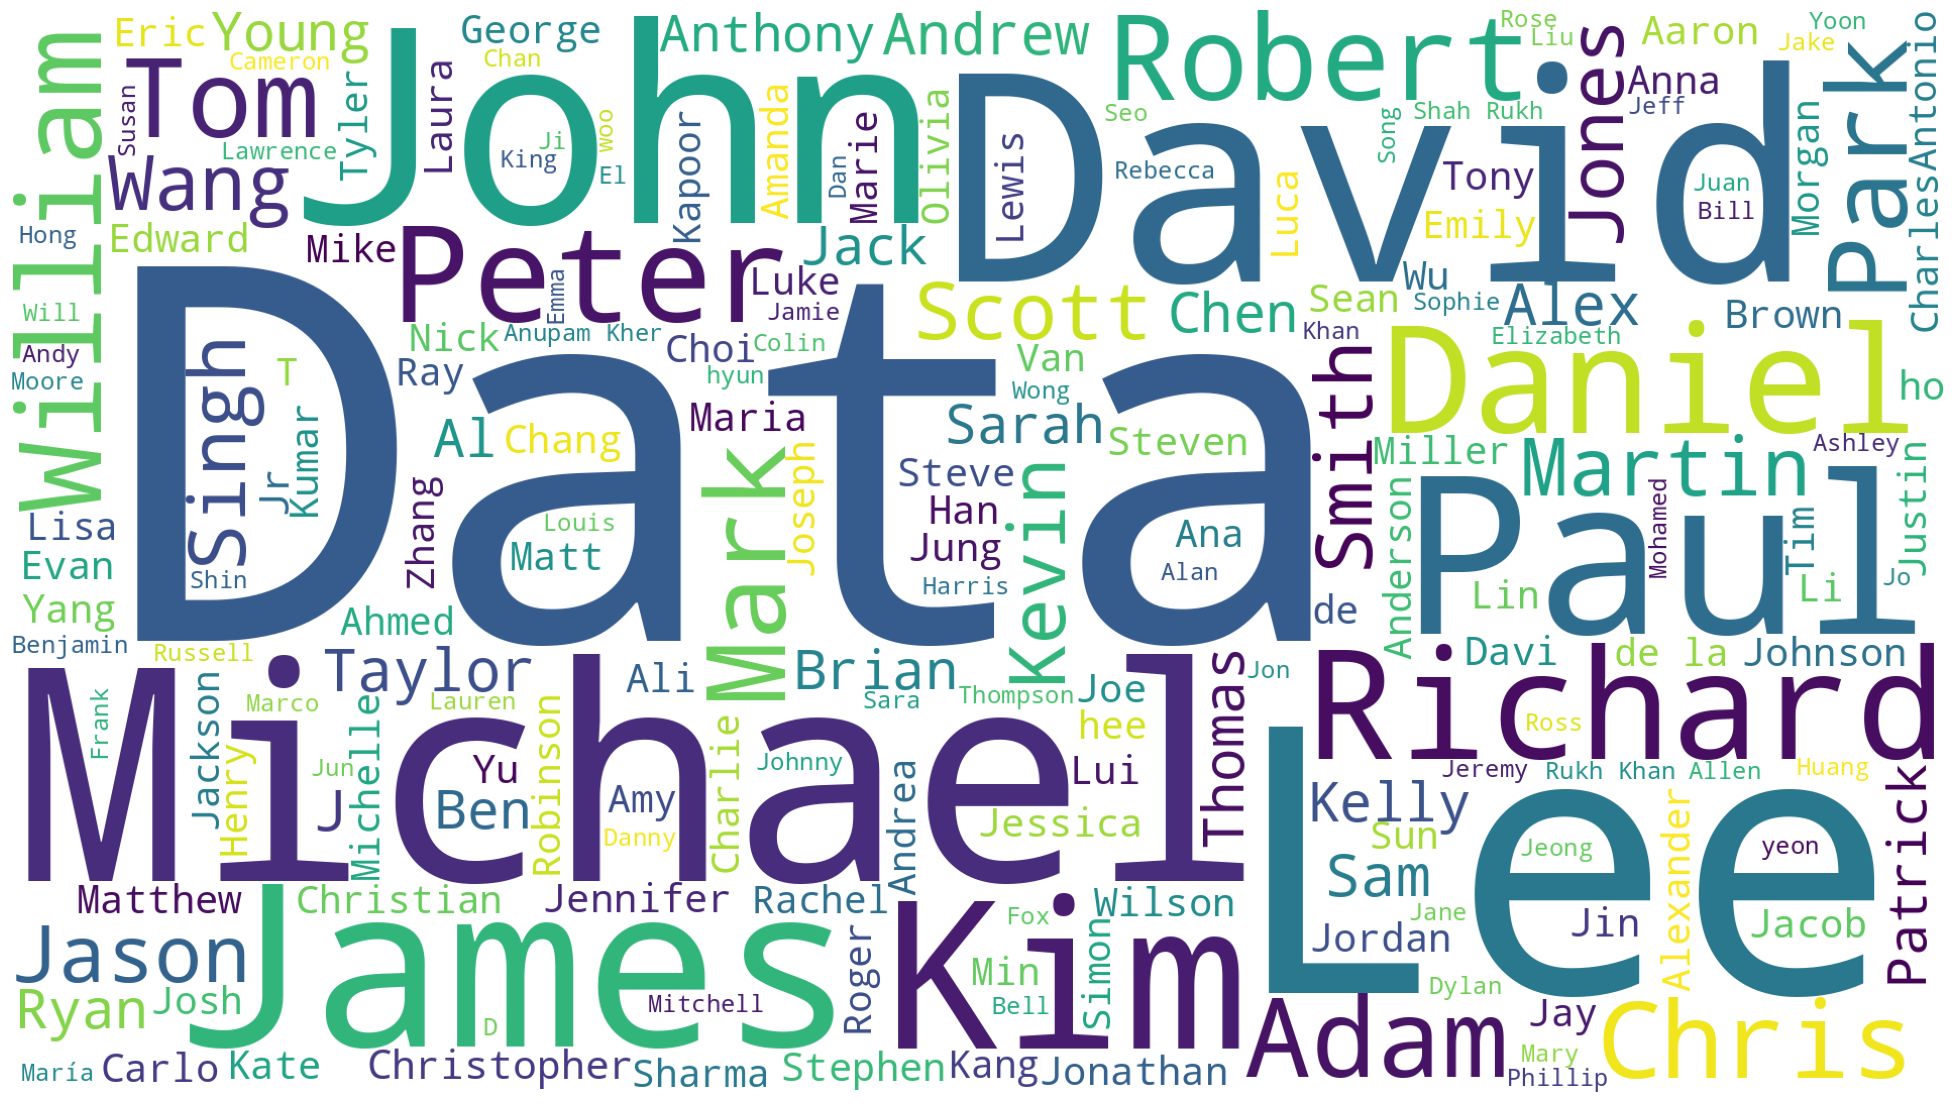

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Cast.png')
plt.show()

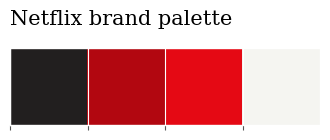

In [ ]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
plt.title('Netflix brand palette', loc = 'left', fontfamily = 'serif', fontsize = 15, y = 1.2)
plt.show()

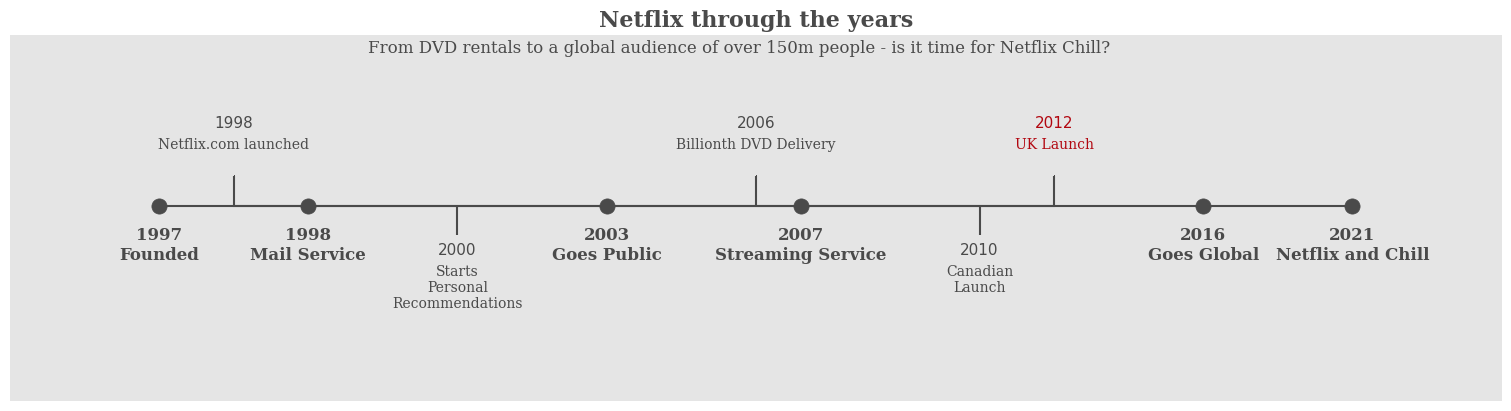

In [ ]:
from datetime import datetime

tl_dates = [
            '1997\nFounded',
            '1998\nMail Service',
            '2003\nGoes Public',
            '2007\nStreaming Service',
            '2016\nGoes Global',
            '2021\nNetflix and Chill'
]

tl_x = [1, 2, 4, 5.3, 8, 9]
tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = ['1998', '2000', '2006', '2010', '2012']

tl_text = [
    'Netflix.com launched',
    'Starts\nPersonal\nRecommendations', 'Billionth DVD Delivery',
    'Canadian\nLaunch', 'UK Launch'
]

fig, ax = plt.subplots(figsize = (15, 4), constrained_layout = True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

ax.axhline(0, xmin = 0.1, xmax = 0.9, c = '#4a4a4a', zorder = 1)

ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = '#4a4a4a', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30, c = '#4a4a4a', zorder = 3)

for x, date in zip(tl_x, tl_dates):
  ax.text(x, -0.55, date, ha = 'center', fontfamily = 'serif', fontweight = 'bold',
          color = '#4a4a4a', fontsize = 12)

levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = '#4a4a4a')
plt.setp(stemline, color = '#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
  ax.text(x, 1.3 * (idx % 2)-0.5, time, ha='center',
          color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)

  ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

for spine in ['left', 'top', 'right', 'bottom']:
  ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Netflix through the years', fontweight = 'bold', fontfamily = 'serif', fontsize = 16, color = '#4a4a4a')
ax.text(2.4, 1.57, 'From DVD rentals to a global audience of over 150m people - is it time for Netflix Chill?',
        fontfamily = 'serif', fontsize = 12, color = '#4a4a4a')

plt.show()

In [ ]:
x = df.groupby(['Type'])['Type'].count()
y = len(df)
r = ((x / y)).round(2)

mf_ratio = pd.DataFrame(r).T

In [ ]:
mf_ratio

Type,Movie,TV Show
Type,0.69,0.31


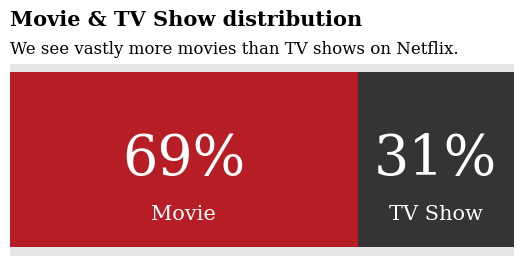

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha = 0.9, label = 'Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left = mf_ratio['Movie'],
        color = '#221f1f', alpha = 0.9, label = 'Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie",
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show",
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

In [ ]:
df['count'] = 1

df['first_country'] = df['Country'].apply(lambda x: x.split(',')[0])
df['first_country'].head()

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['Rating'].replace(ratings_ages)
print(df['target_ages'].unique())

df['genre'] = df['Listed in'].apply(lambda x: x.replace(' ,', ',')
                                               .replace(', ', ',').split(','))

df['first_country'].replace('United States', 'USA', inplace = True)
df['first_country'].replace('United Kingdom', 'UK', inplace = True)
df['first_country'].replace('South Korea', 'S. Korea', inplace = True)

['Adults' 'Teens' 'Older Kids' 'Kids']


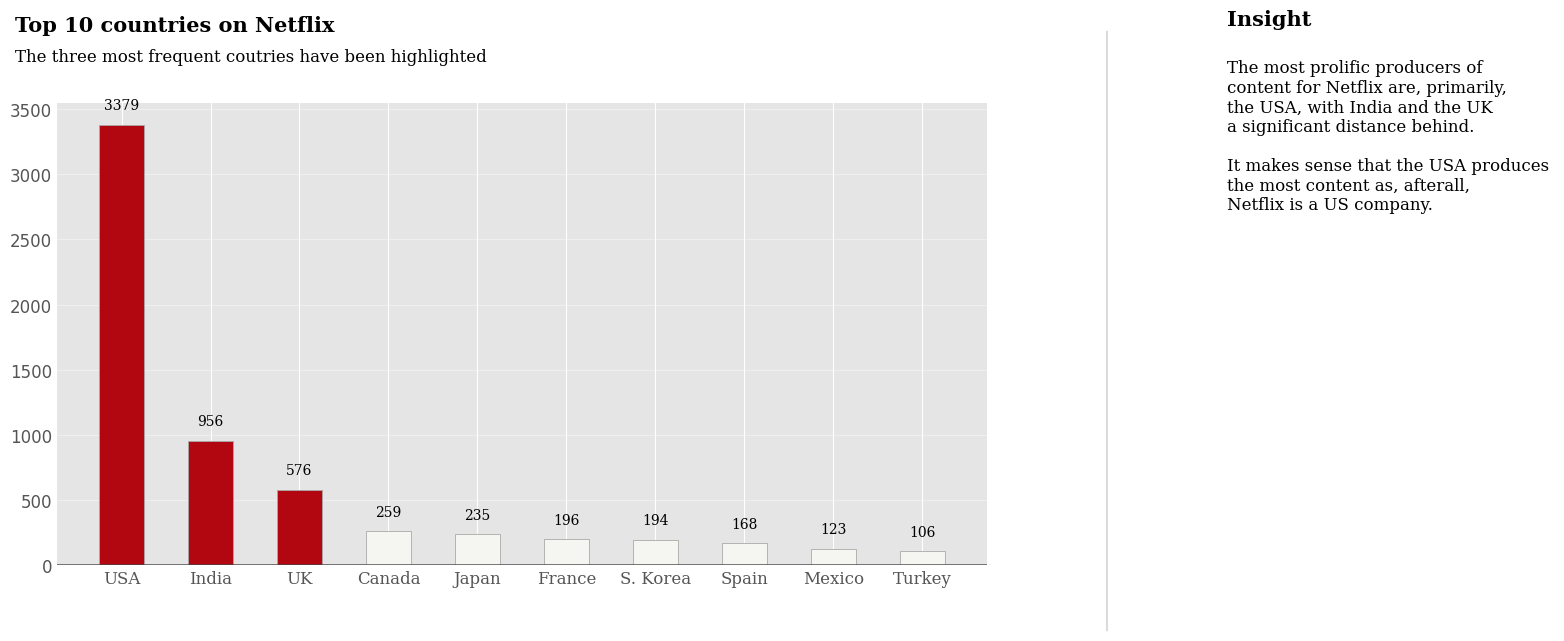

In [ ]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending = False)[:10]

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#b20710'

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(data.index, data, width = 0.5, edgecolor = 'darkgrey', linewidth = 0.6, color = color_map)

for i in data.index:
  ax.annotate(f'{data[i]}',
              xy = (i, data[i] + 150),
              va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily = 'serif', rotation = 0)

fig.text(0.09, 1, 'Top 10 countries on Netflix',
                  fontsize = 15,
                  fontweight = 'bold',
                  fontfamily = 'serif')

fig.text(0.09, 0.95, 'The three most frequent coutries have been highlighted',
                  fontsize = 12,
                  fontweight = 'light',
                  fontfamily = 'serif')

fig.text(1.1, 1.01, 'Insight',
                  fontsize = 15,
                  fontweight = 'bold',
                  fontfamily = 'serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces
the most content as, afterall,
Netflix is a US company.
''',
                  fontsize = 12,
                  fontweight = 'light',
                  fontfamily = 'serif')

ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = 0.7)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform = fig.transFigure, figure = fig, color = 'black', lw = 0.2)
fig.lines.extend([l1])

ax.tick_params(axis = u'both', which = u'both', length = 0)

plt.show()

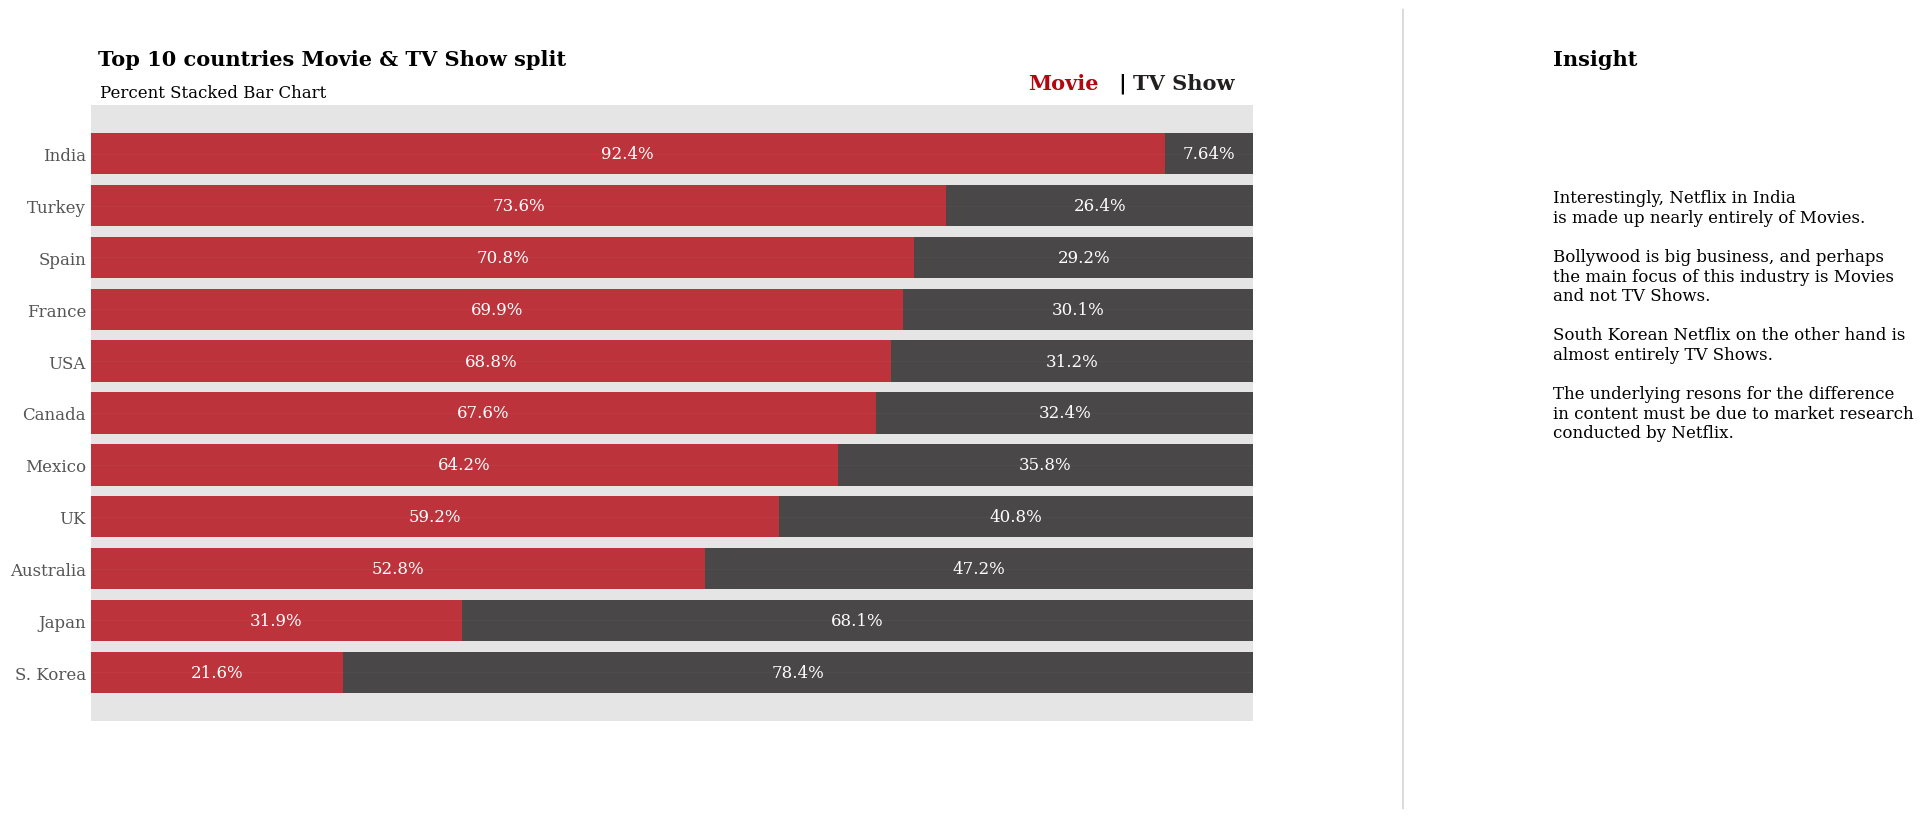

In [ ]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['Type', 'first_country']].groupby('first_country')['Type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'],
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'],
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif', color='white')

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies.

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is
almost entirely TV Shows.

The underlying resons for the difference
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
order = pd.DataFrame(df.groupby('Rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['Rating'])


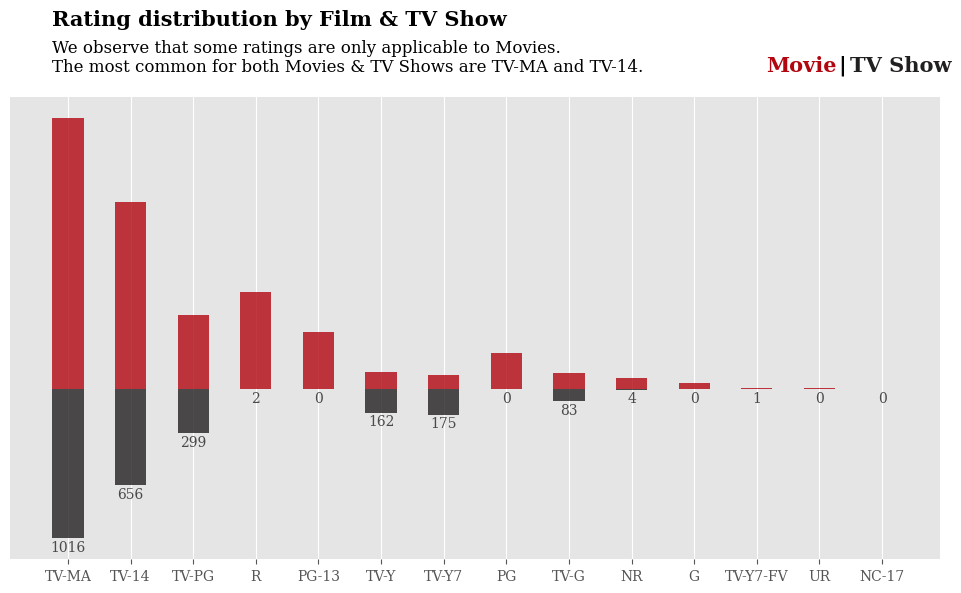

In [ ]:
mf = df.groupby('Type')['Rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89,
'''We observe that some ratings are only applicable to Movies.
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

In [ ]:
df['Added Date'] = pd.to_datetime(df['Added Date'])

df['month_added'] = df['Added Date'].dt.month
df['month_name_added'] = df['Added Date'].dt.month_name()
df['year_added'] = df['Added Date'].dt.year

df.head()

,Type,Title,Director,Cast,Country,Added Date,Year,Rating,Duration,Listed in,count,first_country,target_ages,genre,month_added,month_name_added,year_added
0,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",1,Brazil,Adults,"[International TV Shows, TV Dramas, TV Sci-Fi ...",8,August,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",1,Mexico,Adults,"[Dramas, International Movies]",12,December,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",1,Singapore,Adults,"[Horror Movies, International Movies]",12,December,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",1,USA,Teens,"[Action & Adventure, Independent Movies, Sci-F...",11,November,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,1,USA,Teens,[Dramas],1,January,2020


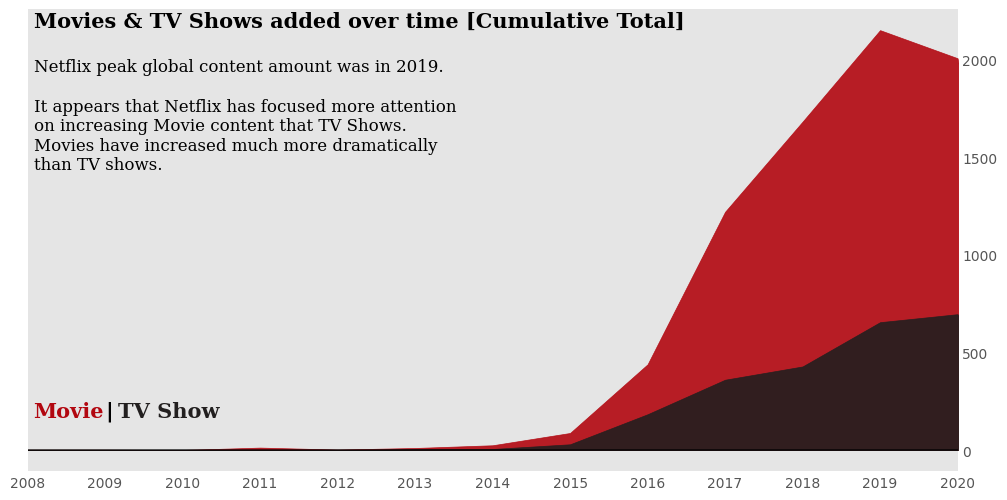

In [ ]:
data_sub = df.groupby('Type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['Type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)



ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58,
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows.
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()